In [18]:
from openenergyid.pvsim.pvlib import PVLibSimulator, PVLibSimulationInput, PVLibQuickScanInput

In [2]:
simulation_parameters = {
    "modelchain": {
        "system": {  # PV System, consisting of one or more PV arrays and inverters
            "arrays": [  # Arrays, consisting of mounts and modules. Default module is 420Wp.
                {
                    "mount": {  # Mount, defined by tilt and azimuth
                        "surface_tilt": 35.0,  # 0 is flat, 90 is vertical
                        "surface_azimuth": 245.0,  # 0/360 is north, 180 is south
                        "kind": "fixed",
                        "racking_model": "open_rack",
                    },
                    "module_type": "glass_glass",
                    "modules_per_string": 6,
                    "module_parameters": {"pdc0": 420, "gamma_pdc": -0.003},
                }
            ],
            "inverter_parameters": {
                "pdc0": 2500.0 / 0.96  # Max Power output in Watts
            },
        },
        "location": {"latitude": 51.2, "longitude": 4.4, "tz": "Europe/Brussels"},
        "aoi_model": "physical",
        "dc_model": "pvwatts",
    },
    "start": "2024-01-01",
    "end": "2025-01-01",
}

In [3]:
simulation_parameters = {
    "modelchain": {
        "system": {
            "surface_tilt": 35,
            "surface_azimuth": 245,
            "modules_per_string": 6,
            "module_parameters": {"pdc0": 420, "gamma_pdc": -0.003},
            "inverter_parameters": {
                "pdc0": 2000 / 0.96  # Max Power output in Watts
            },
            "module_type": "glass_polymer",
            "racking_model": "open_rack",
        },
        "location": {"latitude": 51.2, "longitude": 4.4, "tz": "Europe/Brussels"},
        "aoi_model": "physical",
        "dc_model": "pvwatts",
        "type": "modelchain",
    },
    "start": "2024-01-01",
    "end": "2025-01-01",
}

In [4]:
input_ = PVLibSimulationInput.model_validate(simulation_parameters)

In [5]:
sim = PVLibSimulator.from_pydantic(input_)

In [6]:
sim.load_weather()

In [7]:
sim.simulation_results

timestamp
2024-01-01 00:00:00+01:00    0.0
2024-01-01 00:15:00+01:00    0.0
2024-01-01 00:30:00+01:00    0.0
2024-01-01 00:45:00+01:00    0.0
2024-01-01 01:00:00+01:00    0.0
                            ... 
2024-12-31 22:45:00+01:00    0.0
2024-12-31 23:00:00+01:00    0.0
2024-12-31 23:15:00+01:00    0.0
2024-12-31 23:30:00+01:00    0.0
2024-12-31 23:45:00+01:00    0.0
Length: 35136, dtype: float64

<Axes: xlabel='timestamp', ylabel='kWh/15min'>

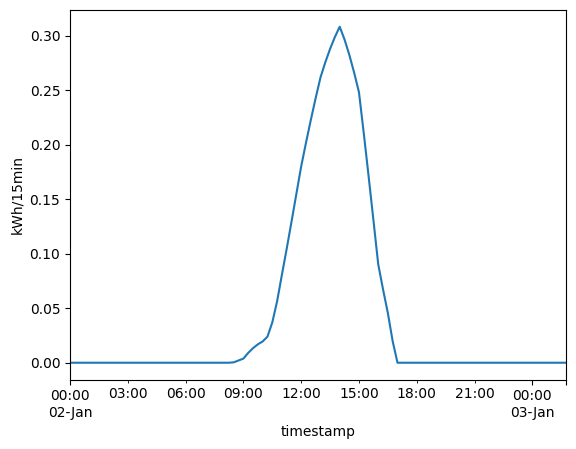

In [8]:
sim.simulation_results.iloc[96:200].plot(ylabel="kWh/15min")

<Axes: xlabel='timestamp', ylabel='kWh'>

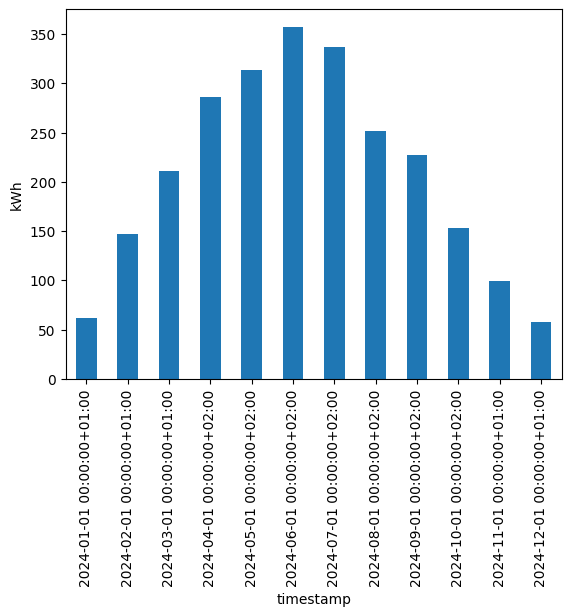

In [9]:
sim.simulation_results.resample("MS").sum().plot.bar(ylabel="kWh")

In [10]:
sim.simulation_results.sum()

np.float64(2502.2413058506627)

In [19]:
simulation_parameters = {
    "modelchain": {
        "system": {
            "surface_tilt": 35,
            "surface_azimuth": 245,
            "modules_per_string": 6,
            "p_inverter": 2000.0,
        },
        "location": {"latitude": 51.2, "longitude": 4.4, "tz": "Europe/Brussels"},
    },
    "start": "2024-01-01",
    "end": "2025-01-01",
}

In [20]:
input_ = PVLibQuickScanInput.model_validate(simulation_parameters)

In [14]:
sim = PVLibSimulator.from_pydantic(input_)

In [15]:
sim.load_weather()

<Axes: xlabel='timestamp', ylabel='kWh/15min'>

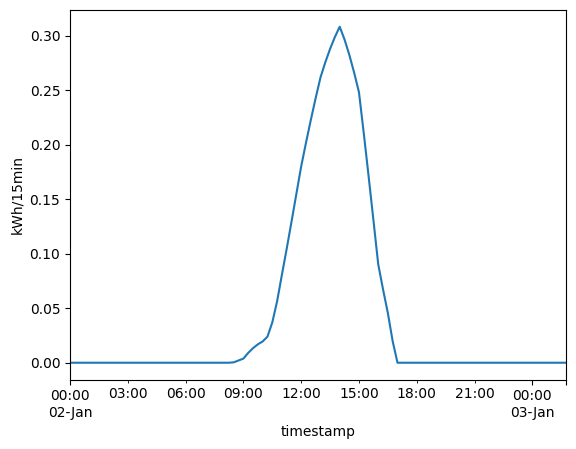

In [16]:
sim.simulation_results.iloc[96:200].plot(ylabel="kWh/15min")

<Axes: xlabel='timestamp', ylabel='kWh'>

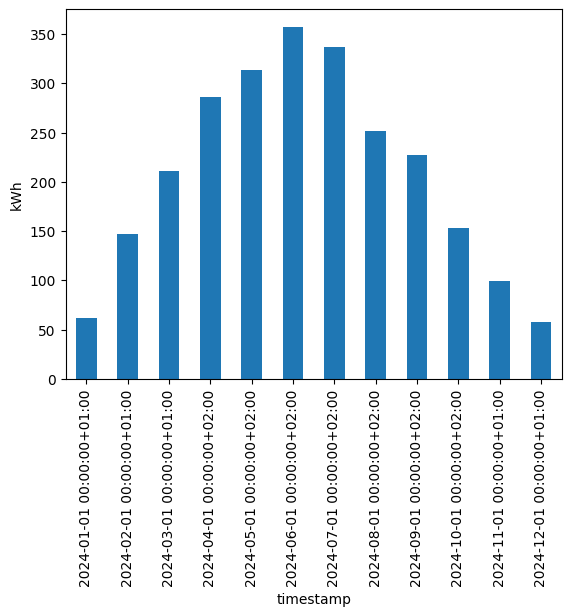

In [17]:
sim.simulation_results.resample("MS").sum().plot.bar(ylabel="kWh")